<a href="https://colab.research.google.com/github/ritwikraha/CV-Practice/blob/master/Unclip_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qq diffusers
!pip install -qq transformers
!pip install -qq accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 4.0 MB/s eta 0:00:00


In [5]:
import torch
from diffusers import DiffusionPipeline
from PIL import Image
from diffusers.utils import load_image, make_image_grid

device = torch.device("cpu" if not torch.cuda.is_available() else "cuda")
dtype = torch.float16 if torch.cuda.is_available() else torch.bfloat16



In [6]:
davinci = load_image('https://i.imgur.com/seodN1o.png')
monalisa = load_image('https://i.imgur.com/gq6q4CJ.jpeg')

In [7]:
pipe = DiffusionPipeline.from_pretrained(
    "kakaobrain/karlo-v1-alpha-image-variations",
    torch_dtype=dtype,
    custom_pipeline="unclip_image_interpolation"
)
pipe.to(device)

images = [davinci, monalisa]
#For best results keep the prompts close in length to each other. Of course, feel free to try out with differing lengths.
generator = torch.Generator(device=device).manual_seed(42)

output = pipe(image = images ,steps = 6, generator = generator)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:655: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
super_res_last/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

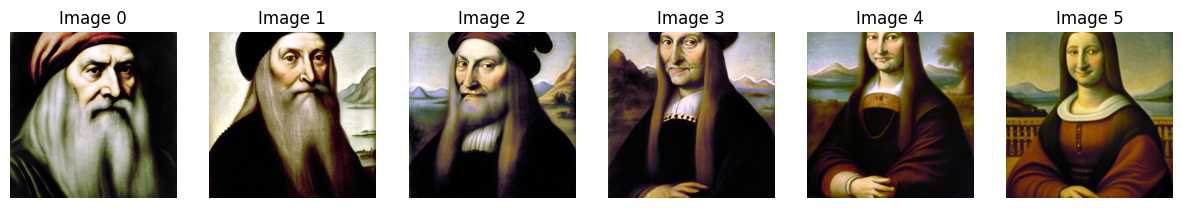

In [8]:
import matplotlib.pyplot as plt

# Assuming 'output.images' is a list of image objects
n_images = len(output.images)
fig, axs = plt.subplots(1, n_images, figsize=(15, 5)) # Adjust the subplot layout as needed

for i, image in enumerate(output.images):
    axs[i].imshow(image)
    axs[i].axis('off')  # to hide the axis
    axs[i].set_title(f'Image {i}')

plt.show()
